# MATH 280 Lecture 13: Least squares problems

In [12]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

## Example 1: Linear regression

Cricket chirps vs Temperature. (source: https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/frame.html)

In [13]:
T=np.array([88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7, 82.0, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5, 76.3])
c=np.array([20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7, 17.1, 15.4, 16.2, 15.0, 17.2, 16.0, 17.0, 14.4])

<IPython.core.display.Javascript object>


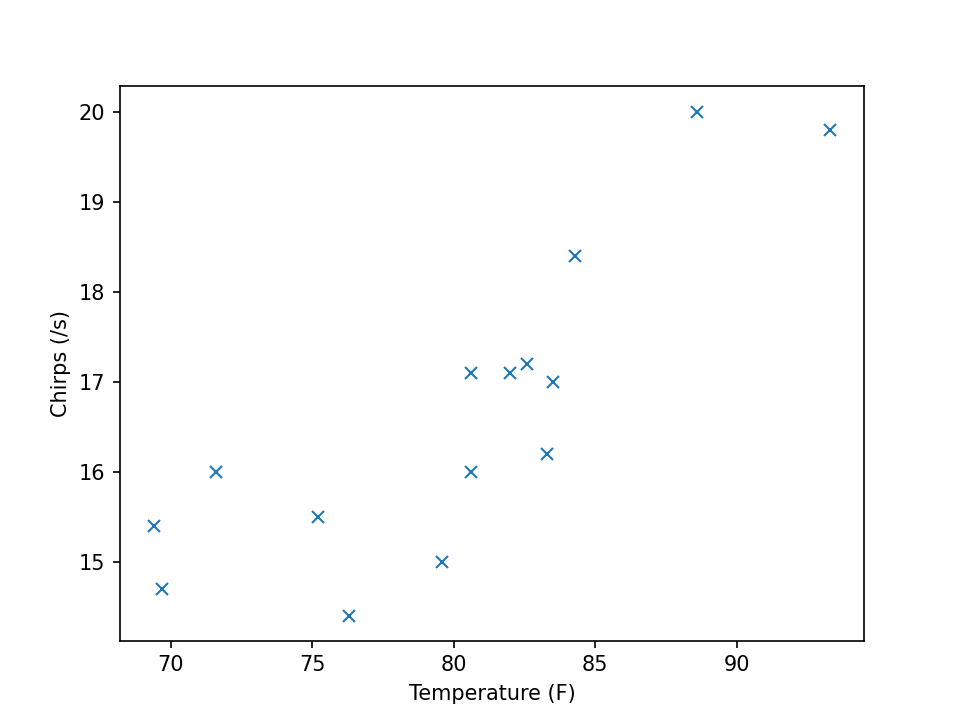

Text(0, 0.5, 'Chirps (/s)')

In [14]:
plt.plot(T,c, 'x')
plt.xlabel('Temperature (F)')
plt.ylabel('Chirps (/s)')

In [15]:
plt.close()

We want to find a line 
$$c(T)=\beta_0+\beta_1 T =  \begin{bmatrix} 1 & T \end{bmatrix}\begin{bmatrix} \beta_0\\ \beta_1 \end{bmatrix},$$
that best approximates the data set.

### Least squares error

$$
\sum_{i=1}^n (c(T_i)-c_i)^2 = \sum_{i=1}^n (\beta_0 +\beta_1 T_i-c_i)^2
$$


<center>...(Derivation on blackboard)...</center>


$$
=\left \| A \underline{\beta} - \underline{c}\right\|^2
$$

where

$$ A= 
\begin{bmatrix} 
1  & T_1\\
1  & T_2\\
\vdots & \vdots\\
1  & T_n
\end{bmatrix}, \qquad 
\underline{\beta} = \begin{bmatrix} \beta_0 \\ \beta_1 \end{bmatrix}, \qquad
\underline{c} = \begin{bmatrix} c_1\\c_2\\ \vdots \\c_n\end{bmatrix}
$$




In [5]:
e=np.ones_like(T)
A=np.stack((e,T)).T # design matrix

print(A)

[[ 1.  88.6]
 [ 1.  71.6]
 [ 1.  93.3]
 [ 1.  84.3]
 [ 1.  80.6]
 [ 1.  75.2]
 [ 1.  69.7]
 [ 1.  82. ]
 [ 1.  69.4]
 [ 1.  83.3]
 [ 1.  79.6]
 [ 1.  82.6]
 [ 1.  80.6]
 [ 1.  83.5]
 [ 1.  76.3]]


In [16]:
print(A.T@A)

[[1.500000e+01 1.200600e+03]
 [1.200600e+03 9.672586e+04]]


In [17]:
#Solve the least squares problem
beta=np.linalg.solve(A.T@A, A.T@c)
print(beta)

[-0.30914439  0.21192501]


<IPython.core.display.Javascript object>


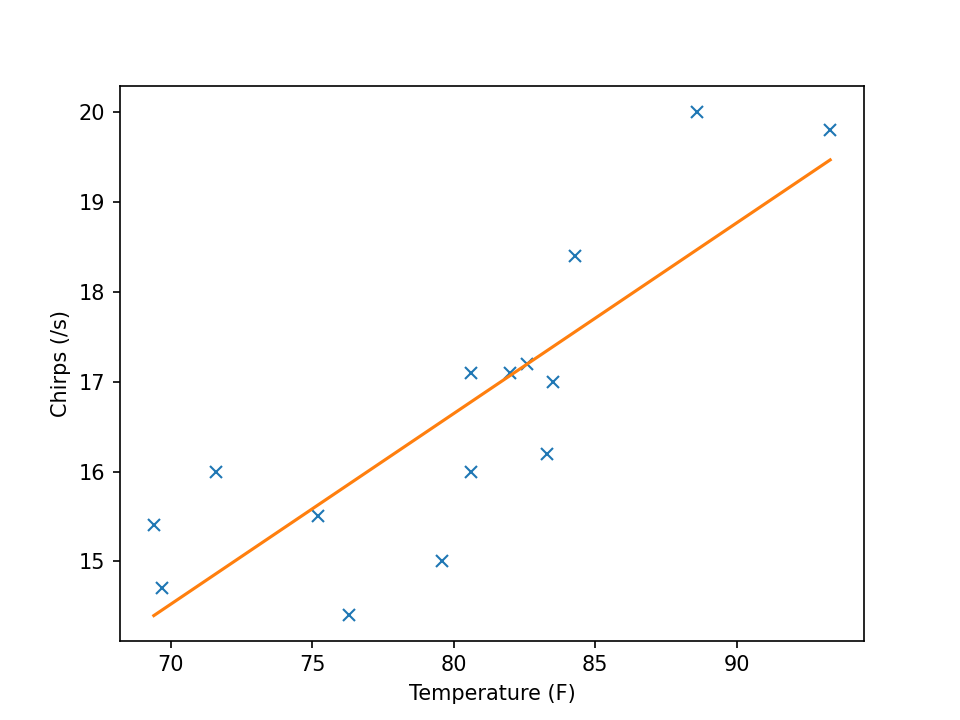

In [18]:
#plot the regression line

xsamples=np.linspace(T.min(), T.max())



plt.plot(T,c, 'x')
plt.xlabel('Temperature (F)')
plt.ylabel('Chirps (/s)')
plt.plot(xsamples, beta[0]+beta[1]*xsamples)

In [19]:
plt.close()

In [20]:
# QR-method (Better choice than normal equation for large systems)
Q,R= np.linalg.qr(A)

betaqr =  np.linalg.solve(R, Q.T@c)

print(betaqr)


[-0.30914439  0.21192501]


In [22]:
# Built-in method:
betanp, r, rank, s = np.linalg.lstsq(A, c, rcond=None)
print(betanp)

[-0.30914439  0.21192501]


In [23]:
np.linalg.lstsq?